### Simple text classification - News article classification, classic ML / Naive-Bayes

In [1]:
# usual imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# NLP -specific imports

# CountVectorizer => the most simple vectorizing tool for text data 
from sklearn.feature_extraction.text import CountVectorizer

# import the multinomial Naive-Bayes (supports more than 2 outcomes too!)
from sklearn.naive_bayes import MultinomialNB



## Based my Own data set First I downlaoded Excel file the convert into CVC file

In [2]:
# Converting Xlsx file into CVC file
# I download this file from this url https://data.mendeley.com/datasets/pk5vs5wjxm/1?utm_source=chatgpt.com


# Load the Excel file
#xlsx_file = "NewsRecommendationDataset.xlsx"
# Convert the first sheet to CSV
# df = pd.read_excel(xlsx_file, sheet_name=0)
# df.to_csv("News_Recommended.csv", index=False)

In [3]:


# In this experiment I saw bit improvement before removing stopewords, there was 92 percent model accury but
# after apply stopwards removing fuction i got 93 percent which is slighly better results.

# Stopword removal led to a slight increase in accuracy for Dhaka Tribune, which had the highest correct predictions.
# Minimal change in performance for The Holiday and The New Nation, suggesting the model is fairly robust.
# Applying stopwords appears to reduce overfitting to less informative words, improving generalization for at least one class

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import multiprocessing as mp

# remove stopwords
nltk.download('stopwords')

def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word.lower() not in stopwords.words('english')]
    return ' '.join(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/waseemimran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:

# I experiment also with this but model works nothing changes, It was same as working with stopwords logic.
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stem_text(text): 
    return ' '.join([stemmer.stem(word) for word in text.split()])

In [5]:
# vectorizer = CountVectorizer(stop_words='english')
# vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))
# ngram_range=(1, 2) means: include unigrams (1-word phrases) and bigrams (2-word phrases)

# I also tried this approach with (1, 3) to include trigrams as well. But...
# I got good model performane with previous approaches, in which model accurecy was 93 or 94 percent which is really good

In [6]:
# load data and see what's inside
df = pd.read_csv("News_Recommended.csv")

df.tail()

,headlines,newspaper,description,catagories,link
1994,Educational Studies Technology Democracy defi...,Prothom Alo,Speakers on the second day of the two-day 1st ...,Technology,https://en.prothomalo.com/bangladesh
1995,Taylor Swift's tour arrives to shake up Europe,Prothom Alo,"The Eras Tour, which began in March 2023, is a...",Entertainment,https://en.prothomalo.com/bangladesh
1996,"National Bank hasn’t been taken over, says new...",Prothom Alo,Khalilur Rahman made the remarks while address...,Business,https://en.prothomalo.com/bangladesh
1997,Health FAgricultures of the 2023 US Human ...,Prothom Alo,We must inquire into how the US State Departme...,Health,https://en.prothomalo.com/bangladesh
1998,Health Election year 2024: Will the polls ...,Prothom Alo,What is the role of elections in countries whe...,Health,https://en.prothomalo.com/bangladesh


In [7]:
# Basic info
print("Total samples:", len(df))
print("\nCategories:\n", df['description'].value_counts())

# Check a few samples
df.head()

Total samples: 1999

Categories:
 description
Arifin Shuvoo’s first look from ‘Neel Chokro’ unveiled                                                                                                  18
Environment protection : ‘Amra Mali’ an exceptional idea of Durbar Tarunnow                                                                             18
Which type of desktop PC to buy?                                                                                                                        18
Riseup Labs: Rising a Next-Generation Bangladeshi ITES company                                                                                          18
Sustainability Report 2023: Siegwerk Reduces Greenhouse Gas Emissions by 9 Percent                                                                      18
                                                                                                                                                        ..
The High Court orders th

,headlines,newspaper,description,catagories,link
0,MV Abdullah leaves UAE for last leg of homewar...,The Daily Star,"The ship MV Abdullah, with 23 Bangladeshi crew...",Business,https://www.thedailystar.net/Health
1,"Heatwave: After fiery April, milder May beckons",The Daily Star,Relief from a severe heatwave expected in May ...,Weather,https://www.thedailystar.net/Health
2,Bar pharmas from raising medicine prices at will,The Daily Star,High Court orders measures to prevent pharmace...,Healthcare,https://www.thedailystar.net/Health
3,IMF Loan: Govt may miss two key targets set fo...,The Daily Star,Concerns raised over government potentially fa...,Economy,https://www.thedailystar.net/Health
4,Columbia University suspends pro-Palestinian p...,The Daily Star,Disciplinary action taken against pro-Palestin...,Education,https://www.thedailystar.net/Health


In [8]:
# small imbalance here going on
df['newspaper'].value_counts()
#df['description'].value_counts()

newspaper
The Holiday           400
Dhaka Tribune         316
The New Nation        254
The Daily Star        225
Daily Post            190
New Age               121
ProthomAlo            116
Prothom Alo           104
Energy Bangla          96
Daily Observer         79
Daily Sun              52
The Asian Age          18
The Daily Observer     18
The The New Nation     10
Name: count, dtype: int64

In [9]:
# Experiment with the colum only description also for some more data combined (description and headlines)
# Accuracy dropped from 0.94 (description only) to 0.92 (combined).
# For all three classes (Dhaka Tribune, The Holiday, The New Nation), the precision, recall, and F1-scores were slightly higher when using only the description.
# The macro and weighted averages of precision, recall, and F1-score also showed a slight decline when using combined features.


# apply the function to the 'headline' column
# df['headlines'] = df['headlines'] + " - " + df['description'].apply(remove_stopwords)
#df['headlines'] = df['headlines'] + " - " + df['description']

# Combine and process the text
# df['headlines'] = (df['headlines'] + " - " + df['description']) \
#     .apply(remove_stopwords) \
#     .apply(stem_text)

df['headlines'] = df['headlines'] + " - " + df['description'].apply(remove_stopwords)
df

,headlines,newspaper,description,catagories,link
0,MV Abdullah leaves UAE for last leg of homewar...,The Daily Star,"The ship MV Abdullah, with 23 Bangladeshi crew...",Business,https://www.thedailystar.net/Health
1,"Heatwave: After fiery April, milder May beckon...",The Daily Star,Relief from a severe heatwave expected in May ...,Weather,https://www.thedailystar.net/Health
2,Bar pharmas from raising medicine prices at wi...,The Daily Star,High Court orders measures to prevent pharmace...,Healthcare,https://www.thedailystar.net/Health
3,IMF Loan: Govt may miss two key targets set fo...,The Daily Star,Concerns raised over government potentially fa...,Economy,https://www.thedailystar.net/Health
4,Columbia University suspends pro-Palestinian p...,The Daily Star,Disciplinary action taken against pro-Palestin...,Education,https://www.thedailystar.net/Health
...,...,...,...,...,...
1994,Educational Studies Technology Democracy defi...,Prothom Alo,Speakers on the second day of the two-day 1st ...,Technology,https://en.prothomalo.com/bangladesh
1995,Taylor Swift's tour arrives to shake up Europe...,Prothom Alo,"The Eras Tour, which began in March 2023, is a...",Entertainment,https://en.prothomalo.com/bangladesh
1996,"National Bank hasn’t been taken over, says new...",Prothom Alo,Khalilur Rahman made the remarks while address...,Business,https://en.prothomalo.com/bangladesh
1997,Health FAgricultures of the 2023 US Human ...,Prothom Alo,We must inquire into how the US State Departme...,Health,https://en.prothomalo.com/bangladesh


In [10]:
# select only "category" and "headline" columns
# category is going to be the target
df = df[['newspaper', 'headlines']]
df

,newspaper,headlines
0,The Daily Star,MV Abdullah leaves UAE for last leg of homewar...
1,The Daily Star,"Heatwave: After fiery April, milder May beckon..."
2,The Daily Star,Bar pharmas from raising medicine prices at wi...
3,The Daily Star,IMF Loan: Govt may miss two key targets set fo...
4,The Daily Star,Columbia University suspends pro-Palestinian p...
...,...,...
1994,Prothom Alo,Educational Studies Technology Democracy defi...
1995,Prothom Alo,Taylor Swift's tour arrives to shake up Europe...
1996,Prothom Alo,"National Bank hasn’t been taken over, says new..."
1997,Prothom Alo,Health FAgricultures of the 2023 US Human ...


In [11]:
 # only select three categories
# double-check the order of the labels
# NaiveBayes by default seems to place them in alphabetical order
labels = ['The Holiday', 'Dhaka Tribune', 'The New Nation']

In [12]:
# filter only the needed categories
# original code by ChatGPT, prompt: 
# "I have text categories in my pandas DataFrame, how to filter only certain categories from the data?"

# List of categories to filter
categories_to_filter = labels

# Filter rows where category is in the list
df = df[df['newspaper'].isin(categories_to_filter)]

In [13]:
# sanity check, do we have to correct categories
df['newspaper'].value_counts()

newspaper
The Holiday       400
Dhaka Tribune     316
The New Nation    254
Name: count, dtype: int64

In [14]:
df

,newspaper,headlines
82,Dhaka Tribune,"Doctors, nurses draw salaries despite being ab..."
83,Dhaka Tribune,DMP uncovers Technical Education Board forgery...
84,Dhaka Tribune,Familial fiasco in upazila polls: AL policymak...
85,Dhaka Tribune,Forced merger of banks in serious doubt - Repo...
86,Dhaka Tribune,"Schools, colleges closed across Bangladesh, pr..."
...,...,...
1890,Dhaka Tribune,Move for preserving our archaeological heritag...
1891,Dhaka Tribune,Artificial Intelligence: Dark clouds must not ...
1892,Dhaka Tribune,Why US as planet’s top polluter won’t pay repa...
1893,Dhaka Tribune,Can solar energy break our fossil fuel dominan...


### Before doing the X/y, we need to vectorize the data

In [15]:
# since Naive-Bayes is very simple and doesn't care about context and semantic
# structure, we can skip tokenization for simple Naive-Bayes models usually
vectorizer = CountVectorizer()

# create X/y -split
X = vectorizer.fit_transform(df['headlines'])
y = df['newspaper'].values

In [16]:
# Using train_test_split without a fixed random_state resulted in 90% accuracy, while setting random_state=42 improved accuracy to 92%.
# This shows that different random splits can affect model performance. By using a fixed random_state, 
# we ensure reproducibility and can consistently evaluate model behavior on the same data split.


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train the Naive-Bayes -model

In [17]:
# create model and train it
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [18]:
# test predictions for metrics later
predictions = model.predict(X_test)

In [19]:
# accuracies etc.
print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

 Dhaka Tribune       0.90      0.89      0.89        61
   The Holiday       1.00      0.97      0.99        79
The New Nation       0.86      0.91      0.88        54

      accuracy                           0.93       194
     macro avg       0.92      0.92      0.92       194
  weighted avg       0.93      0.93      0.93       194



<Axes: >

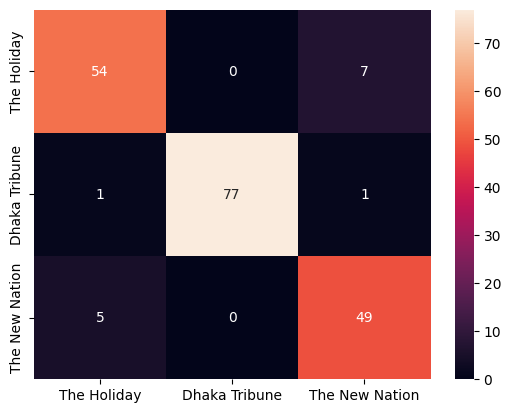

In [20]:
# create confusion matrix and show it
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot=True, fmt="g",
            xticklabels=labels, yticklabels=labels)

### Testing the model with some imaginary e-mails

In [21]:
# switch to decimal format
np.set_printoptions(precision=8, suppress=True)

In [22]:
# you can have multiple messages here!
sample_messages = ["Emran Emon recognised as ‘Sports Hero’",
                   "Leaders gather for an Economy Technology  to address the challenges of climate change, discussing strategies for mitigation, adaptation, and global cooperation.",
                   "Timothee Chalamet and Demi Moore among winners at SAG Awards - a major Oscars predictor",
                   "Hope for koalas after bushfires - After millions of koalas died in bushfires that swept through Australia, the species now has a glimmer of hope."]

# vectorize the new messages and predict the values
processed_text = vectorizer.transform(sample_messages)
results = model.predict_proba(processed_text)

In [23]:
print("Results for the Naive-Bayes and news article headline classification!")

# amount of the test messages above
amount = len(results)

# loop through each message
for index in range(amount):
    
    row = results[index]
    result = np.argmax(row)
    result_text = labels[result]

    print()
    print(sample_messages[index])
    print(row.astype(float))
    print(result_text)
    print()

Results for the Naive-Bayes and news article headline classification!

Emran Emon recognised as ‘Sports Hero’
[0.02165328 0.02886528 0.94948143]
The New Nation


Leaders gather for an Economy Technology  to address the challenges of climate change, discussing strategies for mitigation, adaptation, and global cooperation.
[0. 1. 0.]
Dhaka Tribune


Timothee Chalamet and Demi Moore among winners at SAG Awards - a major Oscars predictor
[0.79231076 0.19575746 0.01193178]
The Holiday


Hope for koalas after bushfires - After millions of koalas died in bushfires that swept through Australia, the species now has a glimmer of hope.
[0.6013325  0.00000601 0.39866148]
The Holiday

